<a href="https://colab.research.google.com/github/anuj-l22/PRML_Project/blob/main/PRML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the Problem Statement

*   PASS




### Loading the dataset

In [1]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
# Repeated Download (Data Downloaded on VM)

--2024-03-29 10:44:10--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243346528 (232M) [application/x-gzip]
Saving to: ‘lfw-funneled.tgz’

lfw-funneled.tgz    100%[===================>] 232.07M   911KB/s    in 3m 1s   

2024-03-29 10:47:11 (1.28 MB/s) - ‘lfw-funneled.tgz’ saved [243346528/243346528]



In [2]:
!tar -xvzf lfw-funneled.tgz

Streaming output truncated to the last 5000 lines.
lfw_funneled/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw_funneled/Delphine_Chuillot/
lfw_funneled/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw_funneled/Paul_LeClerc/
lfw_funneled/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw_funneled/Eddie_Jordan/
lfw_funneled/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw_funneled/Lionel_Richie/
lfw_funneled/Lionel_Richie/Lionel_Richie_0001.jpg
lfw_funneled/Lionel_Richie/Lionel_Richie_0002.jpg
lfw_funneled/Jose_Viegas_Filho/
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw_funneled/Roger_Mahony/
lfw_funneled/Roger_Mahony/Roger_Mahony_0001.jpg
lfw_funneled/Clay_Aiken/
lfw_funneled/Clay_Aiken/Clay_Aiken_0001.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0002.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0003.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0004.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0005.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0006.jpg
lfw_fun

In [3]:
import os
from PIL import Image
import numpy as np

def load_lfw_dataset(dataset_path):
    dataset = []
    for person_name in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_name)
        if os.path.isdir(person_path):
            for image_name in os.listdir(person_path):
                image_path = os.path.join(person_path, image_name)
                image = Image.open(image_path)
                image_array = np.array(image)
                dataset.append({'image': image_array, 'label': person_name})
    return dataset

# Usage
dataset_path = '/content/lfw_funneled'
lfw_dataset = load_lfw_dataset(dataset_path)
print(f"Loaded {len(lfw_dataset)} images.")

Loaded 13233 images.


### Understanding our dataset

In the previous codeblock we have basically created a list of images, each image in the list is a dictionary which contains corresponding image array and label.




Andrew_Bernard


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
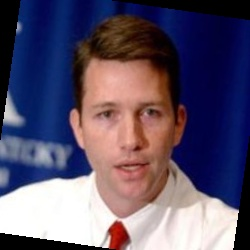

In [4]:
# Displaying one of the images
index_to_display = 0

image_array = lfw_dataset[index_to_display]['image']
label = lfw_dataset[index_to_display]['label']

print(label)
image_array

In [5]:
# Let's check the shape of our image array

image_array.shape

(250, 250, 3)

#### As we can see , a single Image is represented as an image array of shape (250, 250, 3)

*   The first dimension (250) denotes the height of the image in pixels.
*   The second dimension (250) denotes the width of the image in pixels.
*   The third dimension (3) denotes that each pixel have 3 values corresponding to intensity of Red , Green and Blue channels.



In [6]:
# Printing RGB values corresponding to a pixel

r_idx = 0          # From a grid of 250 * 250 pixels which show an image , choose a pixel corresponding to r_idx and c_idx
c_idx = 0
pxl = image_array[r_idx][c_idx]
pxl

array([0, 0, 0], dtype=uint8)

#### Extracting Feature and Target Variables

*   We will create a list of image arrays( Features variable X).
*   We will create a list of corresponding labels (Target variable y).
*   We will perform categorical encoding on target variable .



In [7]:
X = [entry['image'] for entry in lfw_dataset]
y = [entry['label'] for entry in lfw_dataset]

# Convert y to numerical labels
label_to_index = {label: index for index, label in enumerate(set(y))}
y_numerical = [label_to_index[label] for label in y]
X_ = np.array(X)
print(f"Number of samples: {len(X)}")
print(f"Number of samples: {X_.shape}")
print(f"Number of unique labels: {len(set(y_numerical))}")

Number of samples: 13233
Number of samples: (13233, 250, 250, 3)
Number of unique labels: 5749


In [8]:
y[:20]

['Andrew_Bernard',
 'Inam-ul-Haq',
 'Inam-ul-Haq',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Richard_Gephardt',
 'Flor_Montulo',
 'Flor_Montulo',
 'William_Bulger',
 'William_Bulger',
 'William_Bulger',
 'William_Bulger']

In [9]:
y_numerical[np.argmax(y_numerical)]

5748

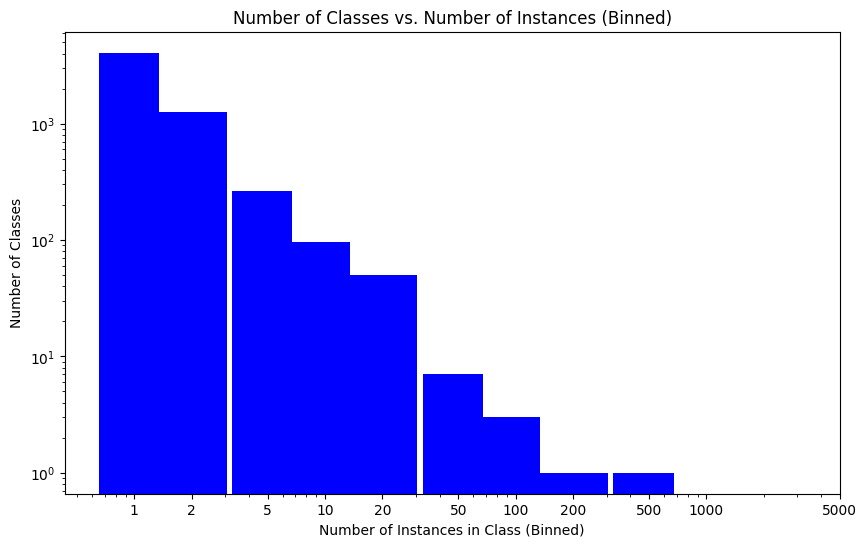

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_binned_class_histogram(y):
    # Count the number of instances per class
    class_counts = Counter(y)
    # Get the frequencies of instance counts
    instance_counts = list(class_counts.values())

    # Choose bin edges to suit the distribution
    # This creates bins that capture single instance classes, 2-5, 6-10, 11-20, etc.
    bins = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 5000]

    # Plot the histogram with the specified bins
    plt.figure(figsize=(10, 6))
    plt.hist(instance_counts, bins=bins, color='blue', rwidth=0.7, align='left')
    plt.xscale('log')  # Using a log scale for better visibility
    plt.yscale('log')  # Using a log scale for better visibility
    plt.title('Number of Classes vs. Number of Instances (Binned)')
    plt.xlabel('Number of Instances in Class (Binned)')
    plt.ylabel('Number of Classes')
    plt.xticks(bins, labels=[str(bin) for bin in bins])  # Set x-ticks to bin edges
    plt.show()

# Example usage
plot_binned_class_histogram(y)

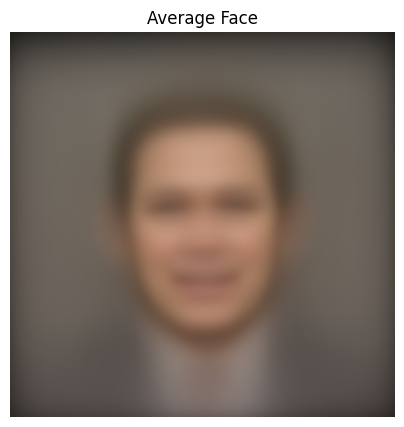

In [11]:
def display_average_face(X):
    avg_face = np.mean(X, axis=0).astype(np.uint8)
    plt.figure(figsize=(5, 5))
    plt.imshow(avg_face)
    plt.title('Average Face')
    plt.axis('off')
    plt.show()

display_average_face(X)


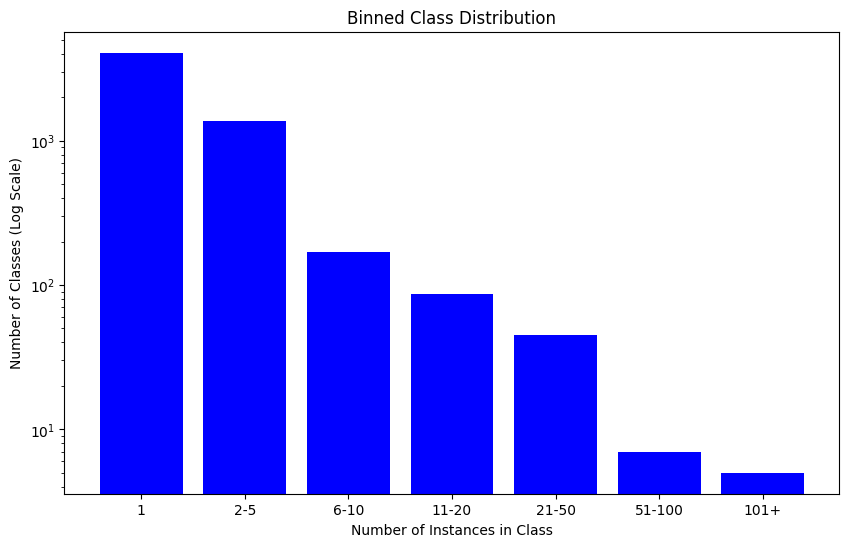

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_binned_class_distribution(y):
    # Count the number of instances per class
    class_counts = Counter(y)
    # Get the frequencies of instance counts
    frequencies = list(class_counts.values())

    # Bin the frequencies
    # For example, '1' means exactly 1 instance, '2-5' means between 2 to 5 instances, etc.
    bins = {'1': 0, '2-5': 0, '6-10': 0, '11-20': 0, '21-50': 0, '51-100': 0, '101+': 0}
    for frequency in frequencies:
        if frequency == 1:
            bins['1'] += 1
        elif 2 <= frequency <= 5:
            bins['2-5'] += 1
        elif 6 <= frequency <= 10:
            bins['6-10'] += 1
        elif 11 <= frequency <= 20:
            bins['11-20'] += 1
        elif 21 <= frequency <= 50:
            bins['21-50'] += 1
        elif 51 <= frequency <= 100:
            bins['51-100'] += 1
        else:
            bins['101+'] += 1

    # Now create a bar plot with the binned data
    plt.figure(figsize=(10, 6))
    plt.bar(bins.keys(), bins.values(), color='blue')
    plt.yscale('log')  # Use log scale if there are bins with very large counts
    plt.title('Binned Class Distribution')
    plt.xlabel('Number of Instances in Class')
    plt.ylabel('Number of Classes (Log Scale)')
    plt.show()

# Example usage
plot_binned_class_distribution(y)


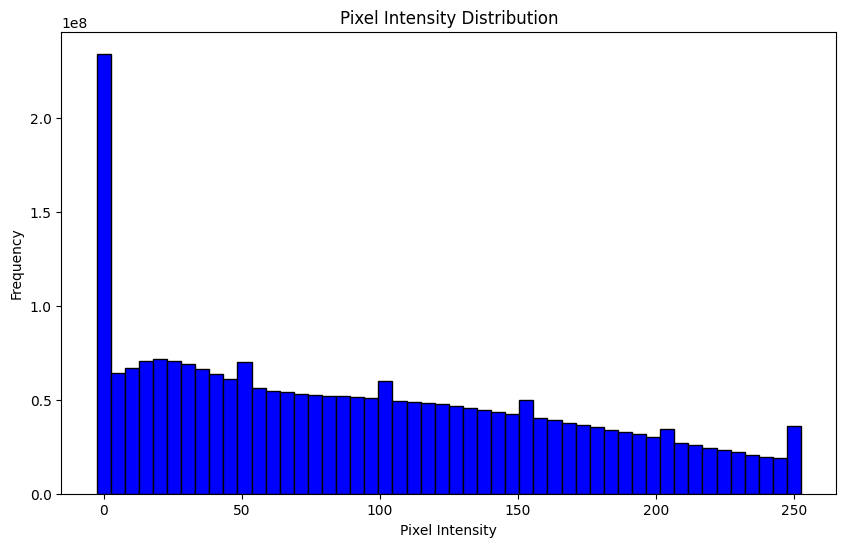

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pixel_intensity_distribution(X):
    plt.figure(figsize=(10, 6))

    # Initialize histogram bins and counts
    bins = np.linspace(0, 255, num=51)  # 50 bins for intensity values between 0 and 255
    hist_counts = np.zeros_like(bins[:-1], dtype=np.int64)

    # Incrementally update histogram counts
    for image in X:
        # Flatten the image to get pixel values and use numpy's histogram function
        pixel_values = image.flatten()
        counts, _ = np.histogram(pixel_values, bins=bins)
        hist_counts += counts  # Update the counts

    # Plot the histogram using the calculated counts
    plt.bar(bins[:-1], hist_counts, width=bins[1]-bins[0], color='blue', edgecolor='black')
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with the list of images X
plot_pixel_intensity_distribution(X)


### Extracting HoG , LBP and CNN Features

# Change made in the below code block

*   Used X_ {np.array} instead of X {List}
*  



<ipython-input-14-e02af9e3ae97>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),


1/1 [==============================] - 2s 2s/step


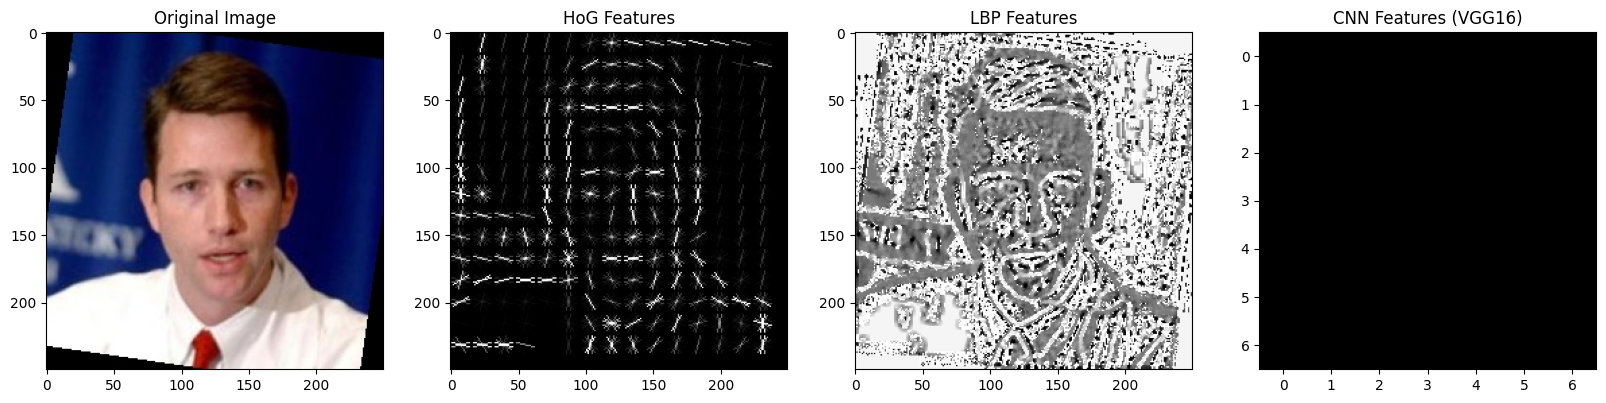

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage import exposure
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming X is your array of images with shape (n_images, 250, 250, 3)
# Select an image
img_index = 0  # Change this index to select a different image
img = X_[img_index]

# Extract HoG features
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Extract LBP features
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(img[:,:,0], n_points, radius, method='uniform')  # Using only the first channel for LBP

# Extract CNN features using VGG16
model = VGG16(weights='imagenet', include_top=False)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
features = model.predict(x)

# Display original image and features
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(img.astype('uint8'))
ax[0].set_title('Original Image')
ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[1].set_title('HoG Features')
ax[2].imshow(lbp, cmap=plt.cm.gray)
ax[2].set_title('LBP Features')
ax[3].imshow(features[0, :, :, 0], cmap=plt.cm.gray)
ax[3].set_title('CNN Features (VGG16)')

plt.show()


#### Extracting CNN Features using pre-trained ResNet-50 model
  
*   The code pre-provided by sir in this [github repository](https://github.com/anandmishra22/PRML-Spring-2023/blob/main/Project/Reference_Codes/refCodes4PRMLProject.ipynb) is used for all feature extraction.



In [1]:
#This code can be used to extract pretrained CNN (ResNet) Features.
#It takes Image Path and returns 2048-dimensional feature.
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load pre-trained ResNet-50 model
resnet = models.resnet50(pretrained=True)
# Remove the last fully connected layer
resnet = nn.Sequential(*list(resnet.children())[:-1])
# Set the model to evaluation mode
resnet.eval()

# Define a function to extract features from an image array
def extract_features_from_array(image_array, model):
    # Convert the image array to a tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32) / 255.0  # Normalize pixel values to [0, 1]

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    # Extract features using the ResNet-50 model
    with torch.no_grad():
        features = model(image_tensor)

    # Remove the batch dimension and return the features
    return features.squeeze(0)

# Create an empty list to store extracted features of each Image in X_
extracted_features = []

# Iterate over each image array in X_
for image_array in X_:
    # Extract features using the ResNet-50 model
    features = extract_features_from_array(X_ ,resnet)

    # Append the extracted features to the list
    extracted_features.append(features)

# Convert the list of features to a torch tensor
extracted_features_tensor = torch.stack(extracted_features)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: name 'X_' is not defined